In [1]:
import json
import mimetypes
import numpy as np
import os
import magic

In [2]:
with open('open_info.json') as f:
    data = json.load(f)

In [3]:
categories = {
    'text': [],
    'document': [],
    'image':[],
    'compressed': [],
    'audio & vedio': [],
    'system': [],
    'other': []
}

In [4]:
for item in data:
    filename = item['Name']
    extension = filename.split('.')[-1].lower()
    size = item['Size']
    MimeType = item['MimeType']
    
    if extension in ['txt', 'csv', 'tsv' ,'log' ,'json' ,'txt' ,'sys' ,'ini' ,'conf' ,'sql' ,'json']:
        categories['text'].append({'filename': filename, 'size': size})
        
    elif extension in ['doc', 'docx', 'xls', 'xlsx' ,'pdf' ,'odt' ,'ppt' ,'pptx' ,'rtf' ]:
        categories['document'].append({'filename': filename, 'size': size})
        
    elif extension in ['jpg', 'jpeg', 'png', 'gif', 'svg', 'bmp', 'tif', 'swf', 'HEIC']:
        categories['image'].append({'filename': filename, 'size': size})
        
    elif extension in ['zip' ,'rar' ,'gz' ,'tar.gz' ,'7z' ,'arj']:
        categories['compressed'].append({'filename': filename, 'size': size})
        
    elif extension in ['mp3' ,'wav', 'flac' ,'mid' ,'wma' ,'mp4' ,'avi' ,'mov' ,'mkv' ,'rm' ,'rmvb' ,'mpg' ,'mpeg' ,'wmv' ,'webm']:
        categories['audio & vedio'].append({'filename': filename, 'size': size})
        
    elif extension in ['html', 'xml', 'md', 'tex', 'sty', 'cls', 'bib', 'sgml', 'yaml', 'dbk', 'rsk','py', 'R', 'java', 'cpp', 'h', 'ipynb', 'bash', 'm', 'mat', 'pl', 'rb', 'swift', 'go', 'lua', 'groovy', 'kt', 'ts', 'scala', 'vb', 'coffee','bat', 'sh', 'msi', 'exe', 'rpm', 'deb', 'bin', 'pkg', 'apk','iso', 'img', 'dmg', 'dmk', 'sdi', 'mdf','css', 'js', 'class', 'c', 'd', 'jas', 'ijvm']:
        categories['system'].append({'filename': filename, 'size': size})
    #else:    
    elif size > 0:
        categories['other'].append({'filename': filename, 'size': size, 'MimeType': MimeType})

In [5]:
other_files = categories['other']  # Get the list of files classified as "other"

# Define a list of MIME types for system files
system_mime_types = ['application/', 'text/', 'image/', 'audio/', 'video/']

new_other = []  # Create a new list to store files that couldn't be classified based on MIME type

for item in other_files:
    filename = item['filename']
    size = item['size']
    MimeType = item['MimeType']
    # Determine the MIME type using mimetypes
    mime_type, _ = mimetypes.guess_type(filename)
    
    if mime_type:
        if mime_type.startswith('text'):
            categories['text'].append({'filename': filename, 'size': size})
        elif mime_type.startswith('image'):
            categories['image'].append({'filename': filename, 'size': size})
        elif mime_type.startswith('application/pdf'):
            categories['document'].append({'filename': filename, 'size': size})
        elif mime_type.startswith('application/zip'):
            categories['compressed'].append({'filename': filename, 'size': size})
        elif mime_type.startswith('audio/') or mime_type.startswith('video/'):
            categories['audio & vedio'].append({'filename': filename, 'size': size})
        elif any(mime_type.startswith(system_type) for system_type in system_mime_types):
            categories['system'].append({'filename': filename, 'size': size})
        else:
            new_other.append({'filename': filename, 'size': size, 'MimeType': MimeType})
    else:
        if MimeType == 'application/x-sharedlib':
            categories['system'].append({'filename': filename, 'size': size})
        elif MimeType == 'application/ogg':
            categories['audio & vedio'].append({'filename': filename, 'size': size})
        else:
            new_other.append({'filename': filename, 'size': size, 'MimeType': MimeType})

# Update the "other" category with new_other list
categories['other'] = new_other

In [6]:
total_sizes = {category: sum(file_info['size'] for file_info in files) for category, files in categories.items()}

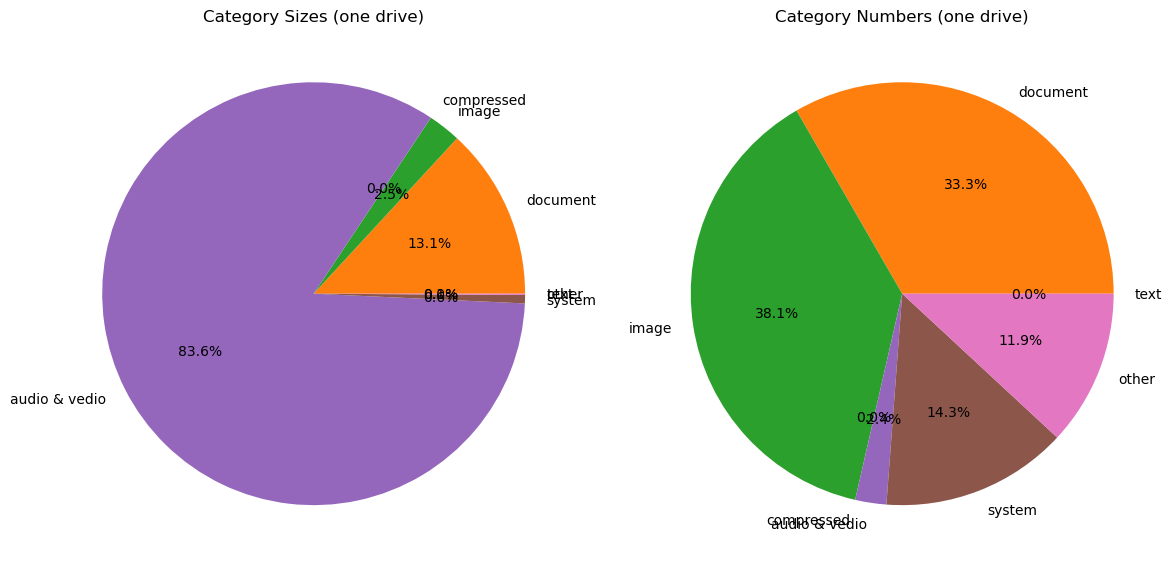

text: 0 files
document: 14 files
image: 16 files
compressed: 0 files
audio & vedio: 1 files
system: 6 files
other: 5 files


In [7]:
import matplotlib.pyplot as plt

categories_labels = list(categories.keys())
sizes = list(total_sizes.values())
file_counts = [len(files) for files in categories.values()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot - Category Sizes
ax1.pie(sizes, labels=categories_labels, autopct='%1.1f%%')
ax1.set_title('Category Sizes (one drive)')

# Second plot - Category Numbers
ax2.pie(file_counts, labels=categories_labels, autopct='%1.1f%%')
ax2.set_title('Category Numbers (one drive)')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Print category information
for category, num_files in zip(categories_labels, file_counts):
    print(f"{category}: {num_files} files")


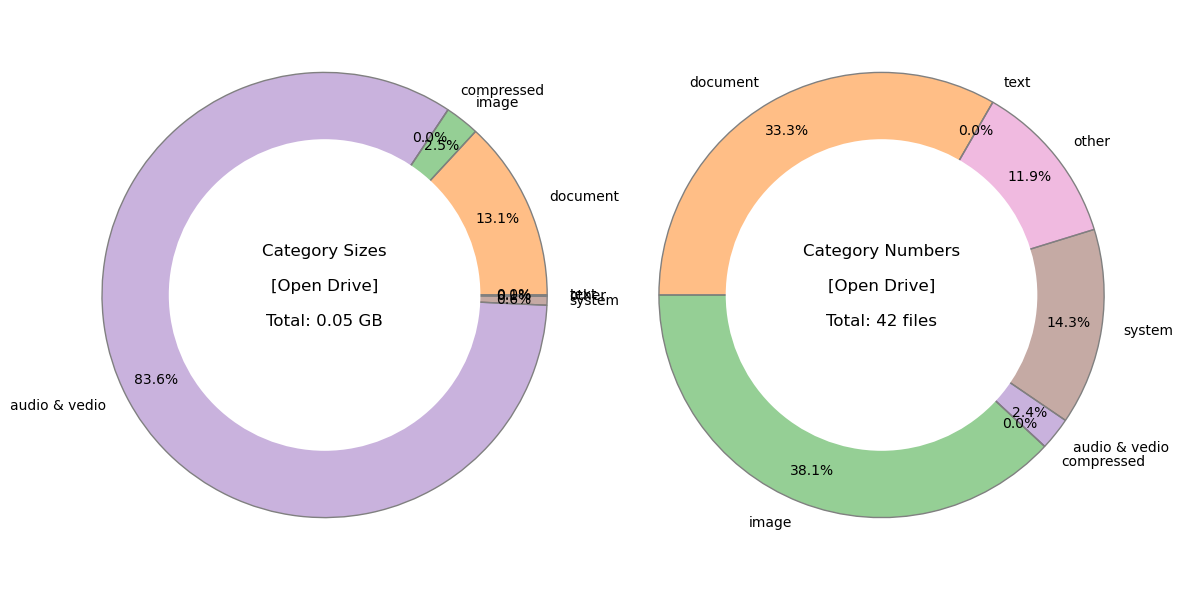

text: 0 files
document: 14 files
image: 16 files
compressed: 0 files
audio & vedio: 1 files
system: 6 files
other: 5 files


In [8]:
import matplotlib.pyplot as plt

# Data (assuming you have defined categories and total_sizes)
categories_labels = list(categories.keys())
sizes = list(total_sizes.values())
file_counts = [len(files) for files in categories.values()]

darker_colors_high_contrast = [
    '#1F77B480',  # Category 1
    '#FF7F0E80',  # Category 2
    '#2CA02C80',  # Category 3
    '#D6272880',  # Category 4
    '#9467BD80',  # Category 5
    '#8C564B80',  # Category 6
    '#E377C280',  # Category 7
]

# Calculate total size in GB
total_size_gb = sum(sizes) / (1024 ** 3)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot - Category Sizes
wedges1, texts1, autotexts1 = ax1.pie(
    sizes,
    labels=categories_labels,
    autopct='%1.1f%%',
    startangle=-0,  # Rotate clockwise
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'grey'},
    colors=darker_colors_high_contrast,
)
centre_circle1 = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle1)
ax1.set_title(f'Category Sizes\n\n[Open Drive]\n\nTotal: {total_size_gb:.2f} GB',y = 0.5, fontsize=12, va='center')
ax1.axis('equal')

# Second subplot - Category Numbers
wedges2, texts2, autotexts2 = ax2.pie(
    file_counts,
    labels=categories_labels,
    autopct='%1.1f%%',
    startangle=60,  # Rotate clockwise
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'grey'},
    colors=darker_colors_high_contrast,
)
centre_circle2 = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(centre_circle2)
ax2.set_title(f'Category Numbers\n\n[Open Drive]\n\nTotal: {sum(file_counts)} files', y = 0.5, fontsize=12, va='center')
ax2.axis('equal')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Print category information
for category, num_files in zip(categories_labels, file_counts):
    print(f"{category}: {num_files} files")


In [9]:
categories['other']

[{'filename': '.DS_Store',
  'size': 8196,
  'MimeType': 'application/octet-stream'},
 {'filename': 'flow.drawio',
  'size': 5384,
  'MimeType': 'application/octet-stream'},
 {'filename': '.DS_Store',
  'size': 8196,
  'MimeType': 'application/octet-stream'},
 {'filename': '.DS_Store',
  'size': 6148,
  'MimeType': 'application/octet-stream'},
 {'filename': 'm=el_main_css',
  'size': 25228,
  'MimeType': 'application/octet-stream'}]